# Task 3: Handwritten Digit Recognition By Shabareesh Nair At Grow Intern

# Importing Dataset and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.datasets import fetch_openml
df = fetch_openml('mnist_784')

# Splitting the data into features and labels

In [18]:
X = df.data
y = df.target.astype(np.uint8)

In [19]:
print(X[:5])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [20]:
print(y[:5])

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8


# Split the data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize the feature values

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(X_train[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
print(X_test[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Created and trained a Multi-layer Perceptron (MLP) classifier

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 10, random_state = 42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=10, random_state=42)

# Make predictions on the train set

In [60]:
y_train_pred = mlp.predict(X_train)

Results_Train = pd.DataFrame({
    'Actual Train' : y_train,
    'Predicted Train' : y_train_pred
})

Results_Train.head(10)

,Actual Train,Predicted Train
47339,5,5
67456,4,4
12308,8,8
32557,0,0
664,2,2
21003,6,6
29637,5,5
57937,4,4
23680,8,8
26306,3,3


# Make predictions on the test set

In [61]:
y_test_pred = mlp.predict(X_test)

Results_Test = pd.DataFrame({
    'Actual Test' : y_test,
    'Predicted Test' : y_test_pred
})

Results_Test.head(10)

,Actual Test,Predicted Test
46730,8,8
48393,4,4
41416,8,8
34506,7,7
43725,7,7
11615,0,0
24656,6,6
22411,2,2
936,7,7
56364,4,4


# Evaluating the Training Model

In [43]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy of Training Set: {accuracy:.2f}')
print()
print('Classification Report of Training Set:')
print(classification_report(y_train, y_train_pred))

Accuracy of Training Set: 1.00

Classification Report of Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5560
           1       1.00      1.00      1.00      6277
           2       1.00      1.00      1.00      5610
           3       1.00      1.00      1.00      5708
           4       1.00      1.00      1.00      5529
           5       1.00      1.00      1.00      5040
           6       1.00      1.00      1.00      5480
           7       1.00      1.00      1.00      5790
           8       1.00      1.00      1.00      5468
           9       0.99      1.00      1.00      5538

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



# Evaluating the Testing Model

In [44]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy of Testing Set: {accuracy:.2f}')
print()
print('Classification Report of Testing Set:')
print(classification_report(y_test, y_test_pred))

Accuracy of Testing Set: 0.97

Classification Report of Testing Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.97      0.96      0.96      1380
           3       0.96      0.97      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.97      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.95      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# Visualize a few training samples and predictions

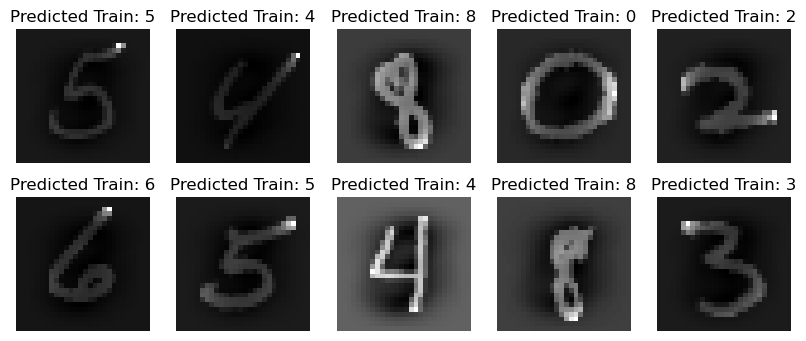

In [57]:
plt.figure(figsize = (10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap = 'gray')
    plt.title(f'Predicted Train: {y_train_pred[i]}')
    plt.axis('off')
plt.show()

# Visualize a few testing samples and predictions

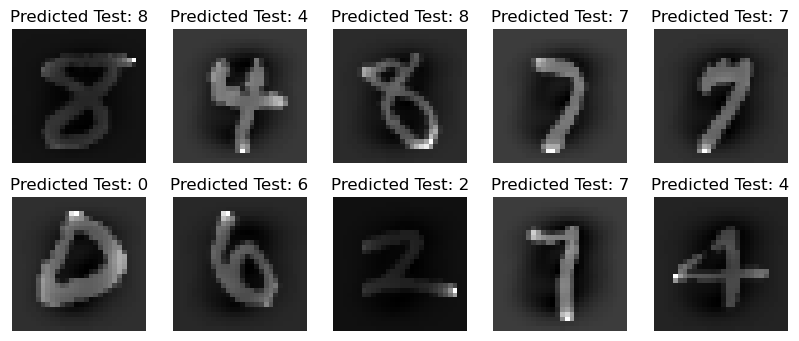

In [59]:
plt.figure(figsize = (10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    plt.title(f'Predicted Test: {y_test_pred[i]}')
    plt.axis('off')
plt.show()

# Making Confusion Matrix and Heat Maps

In [47]:
from sklearn.metrics import confusion_matrix
conf_train = confusion_matrix(y_train, y_train_pred)
print('The Confusion Matrix of Training Set\n', conf_train)
print()
conf_test = confusion_matrix(y_test, y_test_pred)
print('The Confusion Matrix of Testing Set\n', conf_test)

The Confusion Matrix of Training Set
 [[5560    0    0    0    0    0    0    0    0    0]
 [   1 6272    1    0    0    0    0    1    2    0]
 [   0    2 5598    3    5    0    0    1    0    1]
 [   0    0    1 5701    0    2    0    0    2    2]
 [   0    3    0    0 5506    0    0    0    1   19]
 [   0    0    0    2    0 5035    1    0    0    2]
 [   1    0    0    0    0    1 5478    0    0    0]
 [   0    8    0    1    1    0    0 5773    0    7]
 [   0    2    1    4    0    0    0    0 5461    0]
 [   1    4    0    0    2    0    0    5    0 5526]]

The Confusion Matrix of Testing Set
 [[1326    1    4    0    1    1    4    3    3    0]
 [   0 1582    4    2    2    0    1    4    4    1]
 [   2    5 1324   11    8    3    4    8   11    4]
 [   0    3    9 1386    1   10    1    7    4   12]
 [   2    2    1    0 1255    1    4    4    1   25]
 [   0    0    0   20    2 1223   15    2    9    2]
 [   1    2    2    0    9    4 1374    1    3    0]
 [   1    4   13    4 

# Visualizing the Confusion Matrix

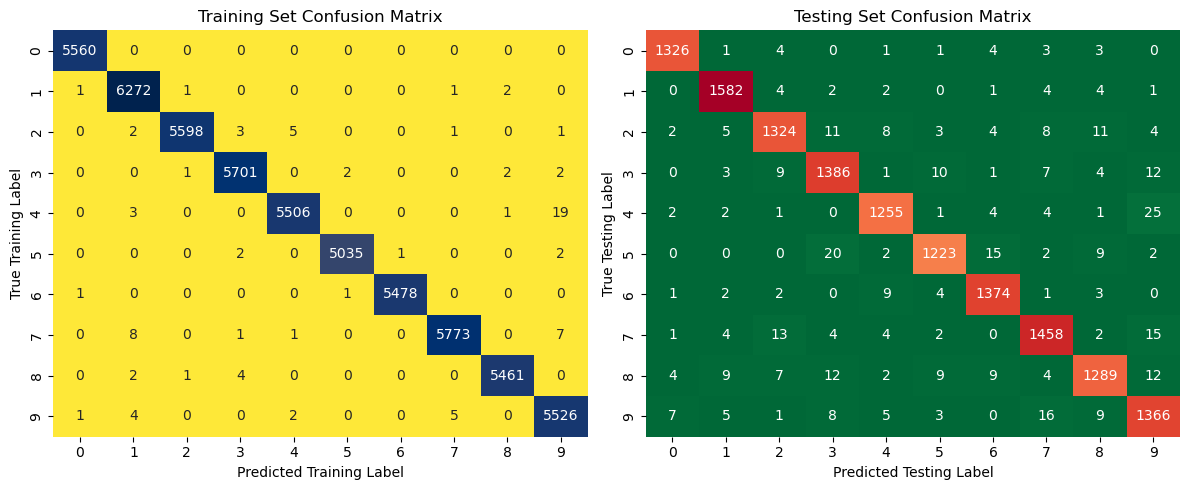

In [56]:
plt.figure(figsize = (12, 5))

# Subplot for Training set
plt.subplot(1, 2, 1)
sns.heatmap(conf_train, annot = True, fmt = 'd', cmap = 'cividis_r', cbar = False,
            xticklabels = np.arange(10), yticklabels = np.arange(10))
plt.xlabel('Predicted Training Label')
plt.ylabel('True Training Label')
plt.title('Training Set Confusion Matrix')

# Subplot for Testing set
plt.subplot(1, 2, 2)
sns.heatmap(conf_test, annot = True, fmt = 'd', cmap = 'RdYlGn_r', cbar = False,
            xticklabels = np.arange(10), yticklabels = np.arange(10))
plt.xlabel('Predicted Testing Label')
plt.ylabel('True Testing Label')
plt.title('Testing Set Confusion Matrix')

plt.tight_layout()
plt.show()